In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 21.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model

In [ ]:
df = pd.read_csv("MSE_FINAL.csv").set_index("Date")

In [ ]:
df.head()

,AIRTEL,BHL,FDHB,FMBCH,ICON,ILLOVO,MPICO,NBM,NBS,NICO,NITL,OMU,PCL,STANDARD,SUNBIRD,TNM
Date,,,,,,,,,,,,,,,,
2024-12-30,90.00,14.55,148.23,555.0,18.05,1355.08,18.53,3462.14,173.98,419.02,440.0,1950.01,2499.79,6000.18,240.08,25.02
2024-12-27,90.00,14.55,148.23,555.0,18.05,1355.09,18.53,3462.14,157.61,419.02,440.0,1950.01,2499.79,6000.18,240.08,25.49
2024-12-24,90.00,14.55,148.23,555.0,18.05,1355.09,18.53,3462.14,174.00,419.03,440.0,1950.01,2499.79,6000.16,240.08,25.49
2024-12-23,91.99,14.55,148.23,555.0,18.05,1355.09,18.53,3462.13,174.00,419.03,440.0,1950.01,2499.79,6000.15,240.08,25.49
2024-12-20,94.97,14.55,148.23,555.0,18.05,1355.08,18.53,3462.12,152.01,419.01,440.0,1950.01,2499.78,6000.17,240.08,25.50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227 entries, 2024-12-30 to 2018-07-30
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AIRTEL    1227 non-null   float64
 1   BHL       1227 non-null   float64
 2   FDHB      1227 non-null   float64
 3   FMBCH     1227 non-null   float64
 4   ICON      1227 non-null   float64
 5   ILLOVO    1227 non-null   float64
 6   MPICO     1227 non-null   float64
 7   NBM       1227 non-null   float64
 8   NBS       1227 non-null   float64
 9   NICO      1227 non-null   float64
 10  NITL      1227 non-null   float64
 11  OMU       1227 non-null   float64
 12  PCL       1227 non-null   float64
 13  STANDARD  1144 non-null   float64
 14  SUNBIRD   893 non-null    float64
 15  TNM       801 non-null    float64
dtypes: float64(16)
memory usage: 163.0+ KB


In [ ]:
df.sort_index(ascending=True, inplace=True)

In [ ]:
df.head()

,AIRTEL,BHL,FDHB,FMBCH,ICON,ILLOVO,MPICO,NBM,NBS,NICO,NITL,OMU,PCL,STANDARD,SUNBIRD,TNM
Date,,,,,,,,,,,,,,,,
2018-07-30,7.0,159.99,240.0,19.50,310.00,8.66,54.0,75.0,2513.25,772.0,670.0,145.0,25.00,NaN,NaN,NaN
2018-08-03,7.0,159.99,240.0,19.50,310.00,8.66,54.0,75.0,2513.25,772.0,670.0,145.0,25.00,NaN,NaN,NaN
2018-08-14,8.0,159.99,240.0,19.50,310.01,8.66,54.0,75.0,2513.25,772.0,670.0,145.0,25.00,NaN,NaN,NaN
2018-08-15,8.0,159.99,240.0,19.45,310.01,8.66,54.0,75.0,2513.25,772.0,670.0,145.0,25.00,NaN,NaN,NaN
2018-08-16,8.0,159.99,240.0,19.50,310.01,8.66,54.0,75.0,2513.25,772.0,670.0,145.0,25.01,NaN,NaN,NaN


In [ ]:
df.head()

,AIRTEL,BHL,FDHB,FMBCH,ICON,ILLOVO,MPICO,NBM,NBS,NICO,NITL,OMU,PCL,STANDARD,SUNBIRD,TNM
Date,,,,,,,,,,,,,,,,
2018-07-30,7.0,159.99,240.0,19.50,310.00,8.66,54.0,75.0,2513.25,772.0,670.0,145.0,25.00,NaN,NaN,NaN
2018-08-03,7.0,159.99,240.0,19.50,310.00,8.66,54.0,75.0,2513.25,772.0,670.0,145.0,25.00,NaN,NaN,NaN
2018-08-14,8.0,159.99,240.0,19.50,310.01,8.66,54.0,75.0,2513.25,772.0,670.0,145.0,25.00,NaN,NaN,NaN
2018-08-15,8.0,159.99,240.0,19.45,310.01,8.66,54.0,75.0,2513.25,772.0,670.0,145.0,25.00,NaN,NaN,NaN
2018-08-16,8.0,159.99,240.0,19.50,310.01,8.66,54.0,75.0,2513.25,772.0,670.0,145.0,25.01,NaN,NaN,NaN


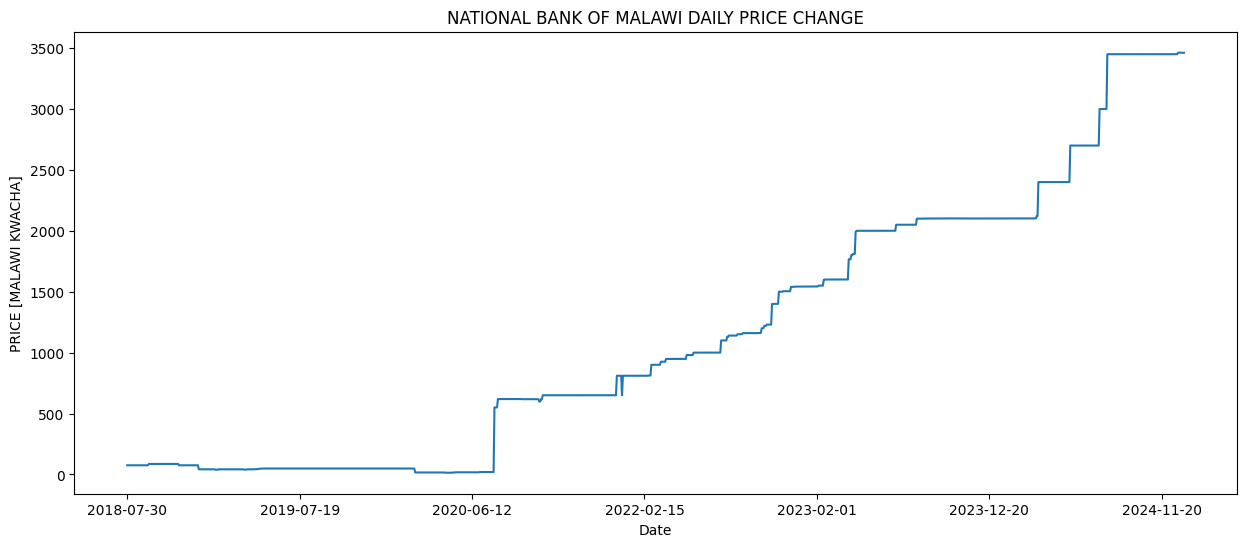

In [ ]:
df["NBM"].plot(figsize=(15,6))
plt.xlabel("Date")
plt.ylabel("PRICE [MALAWI KWACHA]")
plt.title("NATIONAL BANK OF MALAWI DAILY PRICE CHANGE")
plt.show()

In [ ]:
df["NBM"].head()

,NBM
Date,
2018-07-30,75.0
2018-08-03,75.0
2018-08-14,75.0
2018-08-15,75.0
2018-08-16,75.0


In [ ]:
df_nb = df["NBM"]

In [ ]:
df_nb = df_nb.to_frame()

In [ ]:
df_nb= df_nb.astype(float)

In [ ]:
df_nb["returns"] = np.log(df['NBM']/df['NBM'].shift(1))

In [ ]:
df_nb.head()

,NBM,returns
Date,,
2018-07-30,75.0,NaN
2018-08-03,75.0,0.0
2018-08-14,75.0,0.0
2018-08-15,75.0,0.0
2018-08-16,75.0,0.0


In [ ]:
df_nb_r = df_nb["returns"].dropna()

In [ ]:
df_nb_r.head()

,returns
Date,
2018-08-03,0.0
2018-08-14,0.0
2018-08-15,0.0
2018-08-16,0.0
2018-08-17,0.0


In [ ]:
if not pd.api.types.is_datetime64_any_dtype(df_nb_r.index):
    df_nb_r.index = pd.to_datetime(df_nb_r.index)


start_date = '2021-01-01'
end_date = '2021-12-31'


dates_in_2021 = df_nb_r[(df_nb_r.index >= start_date) & (df_nb_r.index <= end_date)]
print(f"Number of dates in 2021: {len(dates_in_2021)}")

if len(dates_in_2021) > 0:
    print(f"Date range in 2021: {dates_in_2021.index.min()} to {dates_in_2021.index.max()}")
else:
    print("No data found for 2021")
# only 87 days in 2021 an anomaly

Number of dates in 2021: 87
Date range in 2021: 2021-01-05 00:00:00 to 2021-12-31 00:00:00


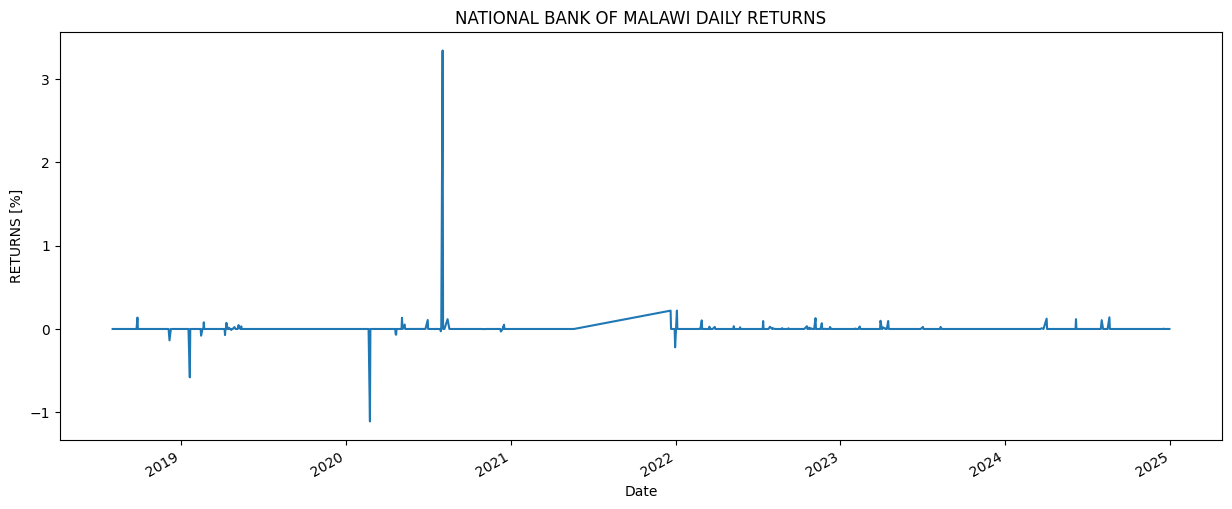

In [ ]:
df_nb_r.plot(figsize=(15,6))
plt.xlabel("Date")
plt.ylabel("RETURNS [%]")
plt.title("NATIONAL BANK OF MALAWI DAILY RETURNS")
plt.show()
# need to check why such a high return was experienced

In [ ]:
#anomaly in returns a single day reaching 2721% return
max_date = df_nb_r.idxmax()
max_value = df_nb_r.max()

print(f"highest log change: {max_value}")
print(f"Date of log change: {max_date}")

highest percentage change: 3.3400167647070473
Date of percentage change: 2020-08-03 00:00:00


In [ ]:

print("Index type:", type(df_nb_r.index))
print("Index values:", df_nb_r.index.tolist()[:10])  # First 10 dates
print("Index range:", df_nb_r.index.min(), "to", df_nb_r.index.max())

# Check if your specific date exists
search_date = '2021-09-10'
if search_date in df_nb_r.index:
    print(f"{search_date} exists in index")
else:
    print(f"{search_date} does NOT exist in index")

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index values: [Timestamp('2018-08-03 00:00:00'), Timestamp('2018-08-14 00:00:00'), Timestamp('2018-08-15 00:00:00'), Timestamp('2018-08-16 00:00:00'), Timestamp('2018-08-17 00:00:00'), Timestamp('2018-08-20 00:00:00'), Timestamp('2018-08-21 00:00:00'), Timestamp('2018-08-22 00:00:00'), Timestamp('2018-08-23 00:00:00'), Timestamp('2018-08-27 00:00:00')]
Index range: 2018-08-03 00:00:00 to 2024-12-30 00:00:00
2021-09-10 does NOT exist in index


In [ ]:
df_nb.head()

,NBM,returns
Date,,
2018-07-30,75.0,NaN
2018-08-03,75.0,0.0
2018-08-14,75.0,0.0
2018-08-15,75.0,0.0
2018-08-16,75.0,0.0


In [ ]:
print(f"Mean return is {df_nb_r.mean()}")
print(f"Standard houly deviation of returns is {df_nb_r.std()}")
print(f"Maximum return is {df_nb_r.max()}")
print(f"Minimum return is {df_nb_r.min()}")
print(f"Median return is {df_nb_r.median()}")
print(f"Variance of returns is {df_nb_r.var()}")
print(f"Skewness of returns is {df_nb_r.skew()}")
print(f"Kurtosis of returns is {df_nb_r.kurtosis()}")

Mean return is 0.003125737406553653
Standard houly deviation of returns is 0.10345602131466644
Maximum return is 3.3400167647070473
Minimum return is -1.1089750757036563
Median return is 0.0
Variance of returns is 0.010703148346260717
Skewness of returns is 26.293946462090755
Kurtosis of returns is 896.6862860434708


In [ ]:
# Deploying a mask for returns higher than 100%
mask = (df_nb_r <=1) & (df_nb_r >= -1)
df_nb_r = df_nb_r[mask]

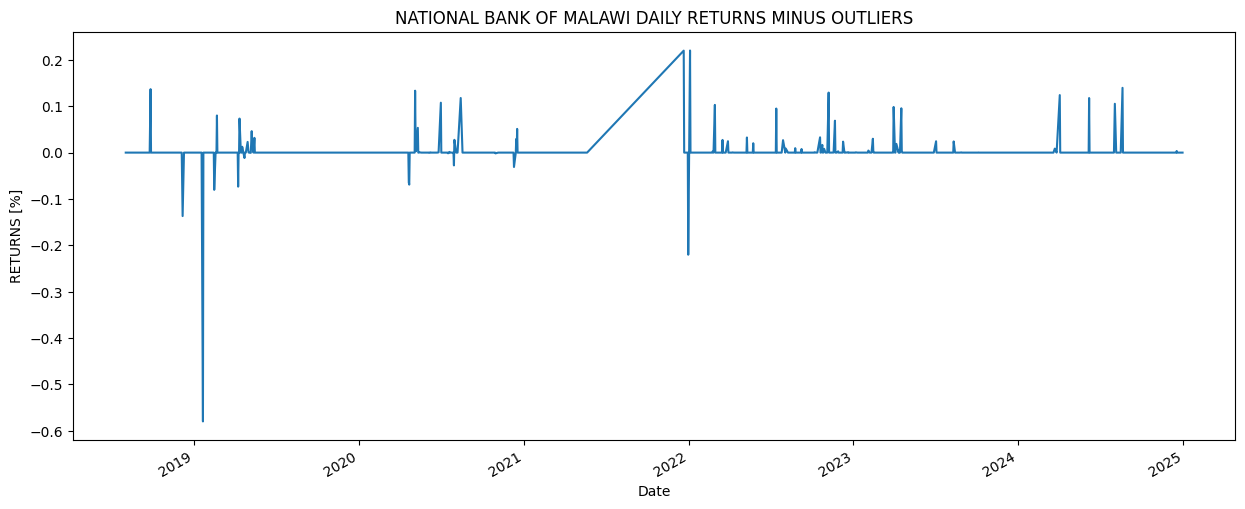

In [ ]:
df_nb_r.plot(figsize=(15,6))
plt.xlabel("Date")
plt.ylabel("RETURNS [%]")
plt.title("NATIONAL BANK OF MALAWI DAILY RETURNS MINUS OUTLIERS")
plt.show()

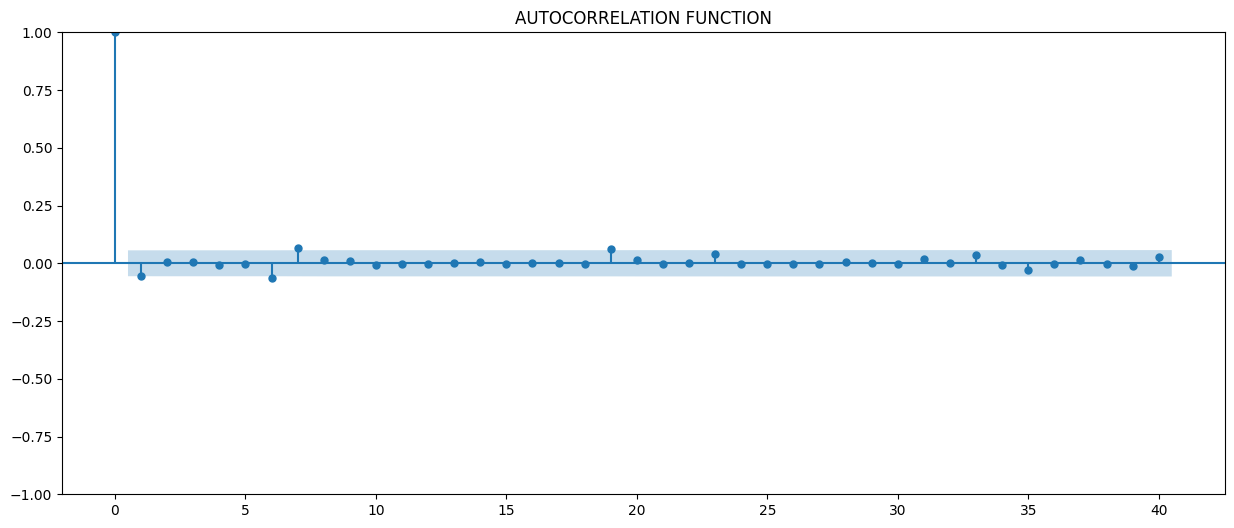

In [ ]:
fig, ax= plt.subplots(figsize=(15,6))
plot_acf(df_nb_r, lags=40, ax=ax)
plt.title("AUTOCORRELATION FUNCTION")
plt.show()
# no autocorrelation

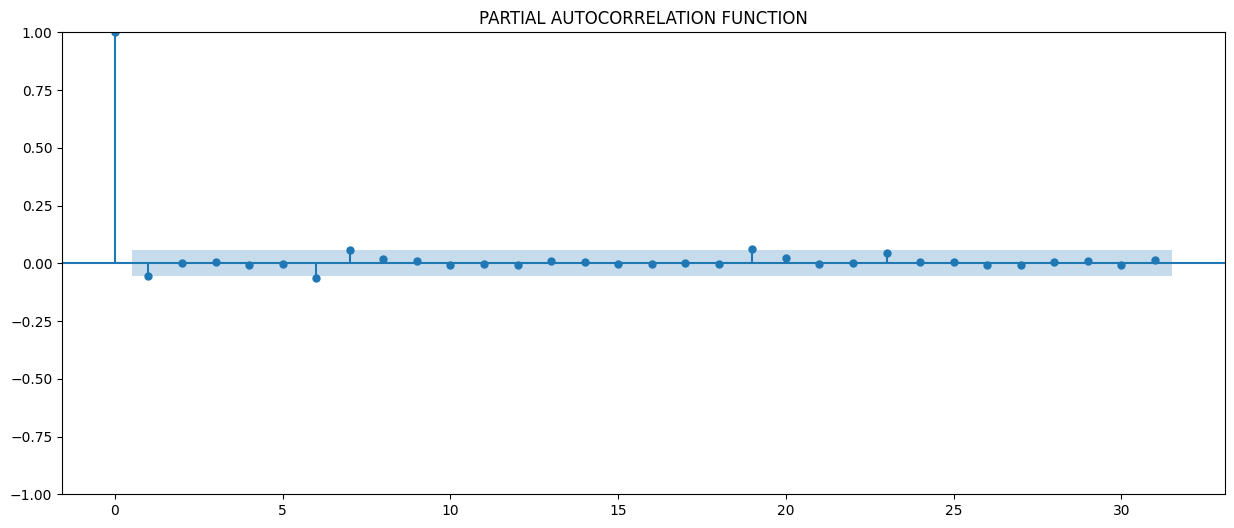

In [ ]:
fig, ax= plt.subplots(figsize=(15,6))
plot_pacf(df_nb_r,ax=ax)
plt.title("PARTIAL AUTOCORRELATION FUNCTION")
plt.show()
# no partial autocorrelation

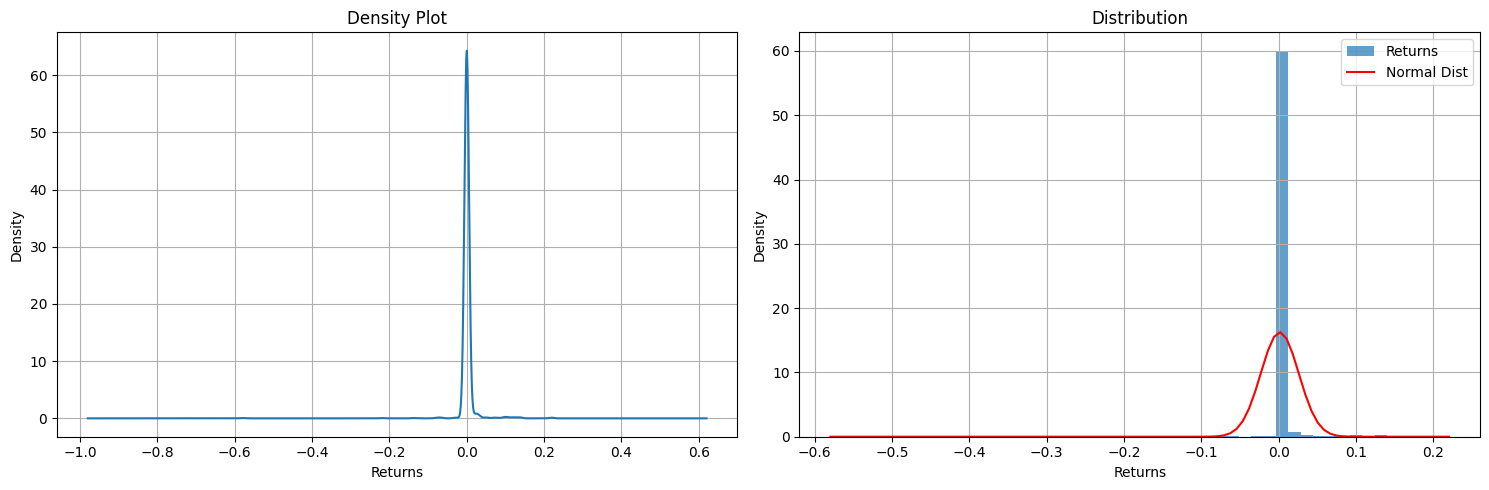

=== Statistics ===
Periods: 1224
Mean: 0.001308
Std Dev: 0.024527
Sharpe Ratio (Daily): 0.2613
Skewness: -9.3320
Kurtosis: 278.7918


In [ ]:
from scipy.stats import norm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

df_nb_r.plot(kind='kde', ax=ax1, title=f'Density Plot')
ax1.set_xlabel('Returns')
ax1.set_ylabel('Density')
ax1.grid(True)


ax2.hist(df_nb_r, bins=50, density=True, alpha=0.7, label='Returns')
mu, std = df_nb_r.mean(), df_nb_r.std()
x = np.linspace(df_nb_r.min(), df_nb_r.max(), 100)
ax2.plot(x, norm.pdf(x, mu, std), 'r-', label='Normal Dist')
ax2.set_title(f'Distribution')
ax2.set_xlabel('Returns')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
# Print statistics
print(f"=== Statistics ===")
print(f"Periods: {len(df_nb_r)}")
print(f"Mean: {df_nb_r.mean():.6f}")
print(f"Std Dev: {df_nb_r.std():.6f}")
print(f"Sharpe Ratio (Daily): {(df_nb_r.mean()/df_nb_r.std() * np.sqrt(24)):.4f}")
print(f"Skewness: {df_nb_r.skew():.4f}")
print(f"Kurtosis: {df_nb_r.kurtosis():.4f}")


<Axes: ylabel='Frequency'>

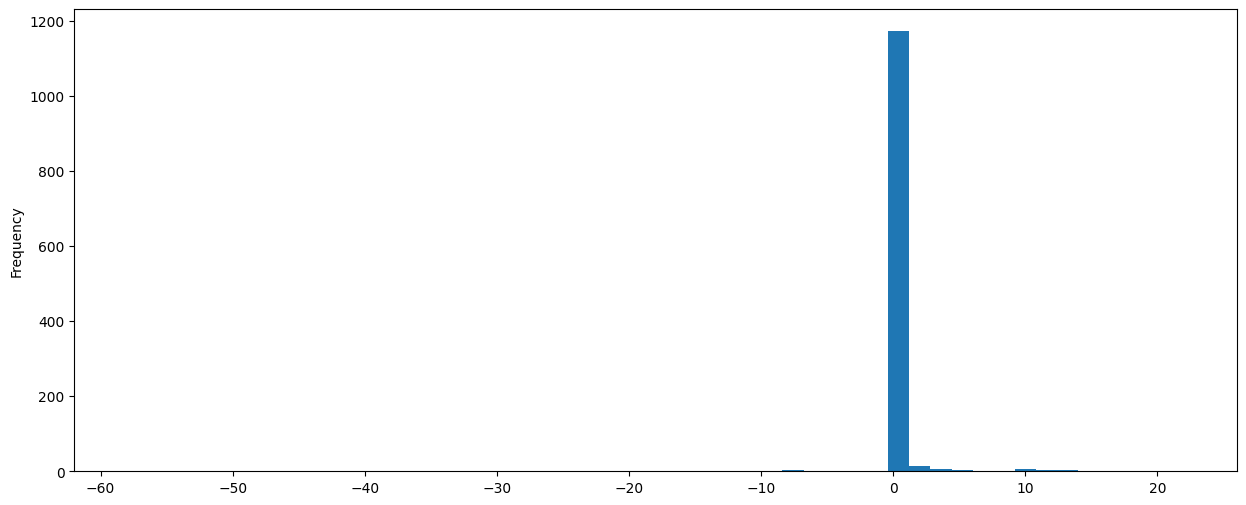

In [ ]:
df_nb_r.plot(kind='hist', bins=50, figsize=(15,6))

In [ ]:
# Create empty list to hold predictions
predictions = []

# Calculate size of test data (20%)
test_size = int(len(df_nb_r) * 0.2)

# Walk forward
for i in range(test_size):
    # Create test data
    y_train = df_nb_r.iloc[: -(test_size - i)]

    # Train model
    model = arch_model(y_train,p=1,q=1, rescale= False).fit(disp=0)

    # Generate next prediction (volatility, not variance)
    next_pred = model.forecast(horizon=1, reindex=False).variance.iloc[0,0] **0.5
    # Append prediction to list
    predictions.append(next_pred)

# Create Series from predictions list
y_test_wfv_n = pd.Series(predictions, index=df_nb_r.tail(test_size).index)

print("y_test_wfv_n type:", type(y_test_wfv_n))
print("y_test_wfv_n shape:", y_test_wfv_n.shape)
y_test_wfv_n.head()


/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


y_test_wfv_n type: <class 'pandas.core.series.Series'>
y_test_wfv_n shape: (244,)


,0
Date,
2023-11-27,0.023521
2023-11-28,0.024205
2023-11-29,0.024314
2023-11-30,0.018207
2023-12-01,0.024022


In [ ]:
actual_volatility = df_nb_r.rolling(window=120).std()

In [ ]:
# Ensure both series cover the same time period
start_date = max(actual_volatility.index[0], y_test_wfv_n.index[0])
end_date = min(actual_volatility.index[-1], y_test_wfv_n.index[-1])

actual_vol_aligned = actual_volatility.loc[start_date:end_date]
predicted_vol_aligned = y_test_wfv_n.loc[start_date:end_date]

# Drop any remaining NaN values
actual_vol_aligned = actual_vol_aligned.dropna()
predicted_vol_aligned = predicted_vol_aligned.dropna()

In [ ]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual_Volatility': actual_vol_aligned ,
    'Predicted_Volatility': predicted_vol_aligned
}).dropna()

print("Comparison DataFrame after cleaning:")
print(comparison_df.head())
print(f"\nNumber of valid observations: {len(comparison_df)}")

Comparison DataFrame after cleaning:
            Actual_Volatility  Predicted_Volatility
Date                                               
2023-11-27            0.00254              0.023521
2023-11-28            0.00254              0.024205
2023-11-29            0.00254              0.024314
2023-11-30            0.00254              0.018207
2023-12-01            0.00254              0.024022

Number of valid observations: 244


In [ ]:
# Create a DataFrame for easy comparison
comparison_df = pd.concat([actual_vol_aligned, (predicted_vol_aligned)], axis=1)
comparison_df.columns = ['Actual_Volatility', 'Predicted_Volatility']

# Display the combined data
print(comparison_df.tail())

# Calculate errors
comparison_df['Error'] = comparison_df['Predicted_Volatility'] - comparison_df['Actual_Volatility']
comparison_df['Absolute_Error'] = np.abs(comparison_df['Error'])
comparison_df['Percentage_Error'] = (comparison_df['Error'] / comparison_df['Actual_Volatility']) * 100

print("\nError Statistics:")
print(f"Mean Absolute Error: {comparison_df['Absolute_Error'].mean():.6f}")
print(f"Mean Percentage Error: {comparison_df['Percentage_Error'].mean():.2f}%")

            Actual_Volatility  Predicted_Volatility
Date                                               
2024-12-20           0.014728              0.022957
2024-12-23           0.014728              0.022291
2024-12-24           0.014728              0.022818
2024-12-27           0.014728              0.023321
2024-12-30           0.014728              0.023535

Error Statistics:
Mean Absolute Error: 0.011193
Mean Percentage Error: 17721.41%


In [ ]:
comparison_df.tail()

,Actual_Volatility,Predicted_Volatility,Error,Absolute_Error,Percentage_Error
Date,,,,,
2024-12-20,0.014728,0.022957,0.008228,0.008228,55.865768
2024-12-23,0.014728,0.022291,0.007563,0.007563,51.346398
2024-12-24,0.014728,0.022818,0.008089,0.008089,54.923972
2024-12-27,0.014728,0.023321,0.008592,0.008592,58.338126
2024-12-30,0.014728,0.023535,0.008807,0.008807,59.792675


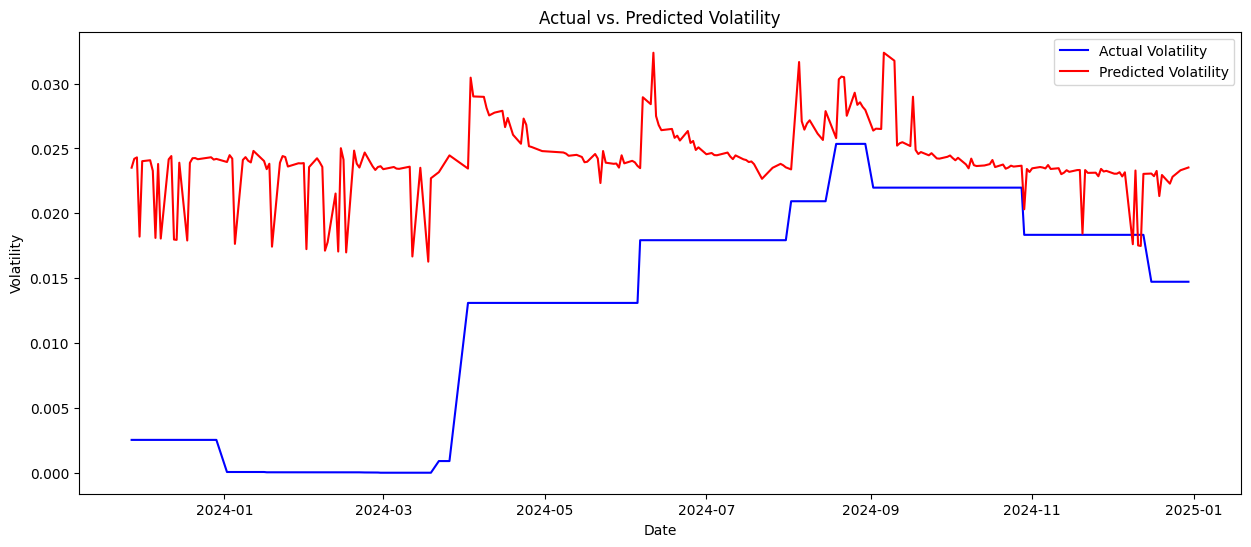

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(comparison_df['Actual_Volatility'], label='Actual Volatility', color='blue')
ax.plot(comparison_df['Predicted_Volatility'], label='Predicted Volatility', color='red')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Actual vs. Predicted Volatility')
plt.legend()
plt.show()

In [ ]:
print("Actual values stats:")
print(f"  Min: {actual_volatility.min()}, Max: {actual_volatility.max()}")
print(f"  Mean: {actual_volatility.mean()}, Std: {actual_volatility.std()}")

print("Predicted values stats:")
print(f"  Min: {y_test_wfv_n.min()}, Max: {y_test_wfv_n.max()}")
print(f"  Mean: {y_test_wfv_n.mean()}, Std: {y_test_wfv_n.std()}")

Actual values stats:
  Min: 3.78058975296296e-05, Max: 0.05759670274680521
  Mean: 0.018272363633159757, Std: 0.014424497407663614
Predicted values stats:
  Min: 0.0162769950131358, Max: 0.032381167603388376
  Mean: 0.02415700440909412, Std: 0.0027011306585896493


In [ ]:
# Your actual volatility calculation might be wrong
print("Actual volatility analysis:")
print(f"Number of unique values: {actual_volatility.nunique()}")
print(f"Value range: {actual_volatility.max() - actual_volatility.min():.8f}")

# If it's almost constant, you're probably not calculating realized volatility properly

Actual volatility analysis:
Number of unique values: 522
Value range: 0.12994897


In [ ]:
# Check your predicted volatility statistics
print("Predicted volatility detailed analysis:")
print(f"Unique values: {y_test_wfv_n.nunique()}")
print(f"Min: {y_test_wfv_n.min():.6f}, Max: {y_test_wfv_n.max():.6f}")
print(f"Mean: {y_test_wfv_n.mean():.6f}, Std: {y_test_wfv_n.std():.6f}")
print(f"Median: {y_test_wfv_n.median():.6f}")

# Check if predictions are constant
if y_test_wfv_n.nunique() < 10:
    print("❌ GARCH model is producing almost constant predictions!")

Predicted volatility detailed analysis:
Unique values: 244
Min: 0.016277, Max: 0.032381
Mean: 0.024157, Std: 0.002701
Median: 0.023969


In [ ]:
# Your predictions are probably DAILY volatility while actual is ANNUALIZED
print("Scale conversion check:")
print(f"Predicted daily: {y_test_wfv_n.mean():.4f}%")
print(f"Predicted annualized: {y_test_wfv_n.mean() * np.sqrt(252):.2f}%")
print(f"Actual annualized: {actual_volatility.mean():.2f}%")

# Even after annualization, they don't match:
# Predicted: 3.04% daily → 48.24% annualized
# Actual: 23.06% annualized
# Still wrong by 2x!

Scale conversion check:
Predicted daily: 0.0242%
Predicted annualized: 0.38%
Actual annualized: 0.01%
